# Neural Network using NumPy
## Simple Example: a Perceptron

**Source**: Justin Johnson at https://sebarnold.net/tutorials/beginner/pytorch_with_examples.html

<center><img src="00_images/31_machine_learning/nn_perceptron_example.png" alt="nn_percepton" style="width: 800px;"/></center>

#### Architecture
- 1 X1 input layer
- 1 hidden layer (actually 2 layers)
    - transformer function
    - activation function
- 1 Y2 output layer

## Activation Functions

**Purpose**
- introduce **non-linearity** into the system

Without activation functions the **nodes are (typically) connected linearly** (i.e., $w\cdot x + b$). If all nodes are computed using linear functions, then the end **prediction** will be **linearly connected to the input**.

**Source**:
- https://towardsdatascience.com/the-importance-and-reasoning-behind-activation-functions-4dc00e74db41

## Gradient Decent/Optimization

Optimization Problem:
- follow the negative of the gradient (i.e., first derivative)
    - thus, move in the direction of the steepest descent

Derivative
\begin{equation}
    \nabla_x = \frac{\partial}{\partial x}
\end{equation}

\begin{equation}
    x_{n+1} = x_n - \alpha \nabla_x{y(x)}
\end{equation}
where $x_n$ is current (e.g., initial) x value and $\alpha$ is the step size (i.e., learning rate), and $x_{n+1}$ is the new x value.

### Example: Gradient descent for a simple one-dimensional function
$$y(x) = x^{2}$$
$$\frac{\partial \ y(x)}{\partial x} = 2x$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def function_x_sqrd(x: float) -> (float, float):
    ''' y(x) = x^2

        Args
            x: input_X1 value

        Returns
            y_value: output_Y2 value evaluated at x
            gradient: derivative value evaluated at x
    '''
    y_value = x**2
    gradient = 2*x

    return y_value, gradient


def gradient_descent(function: callable, x_n: float, step_size: float) -> (float, float):
    ''' Gradient descent algorithm.

        x_n+1 = x_n - step_size * gradient

        Args
            function: a 1-dimensional mathematical function
            x_n: input_X1 x value
            step_size: how big of a step to take (i.e. learning rate)

        Return
            x_n1: new x value
            gradient: gradient value determined at the x_n0 input_X1
    '''
    _, gradient = function(x_n)
    x_n1 = x_n - step_size * gradient

    return x_n1, gradient

Initialize some objects
- the initial guess
- the stepsize/learning rate
- a convergence criteria for stopping the optimization
- a dictionary to collect results

In [3]:
x_guess = 2.0
learning_rate = 0.1
convergence_criteria = 0.01

y_value, gradient = function_x_sqrd(x=x_guess) ## the initial gradient

iteration_dict = {}
iteration_dict[0] = [x_guess, y_value, gradient]

Perform gradient optimization until the convergence criteria is acheived.

In [4]:
iteration = 0

while gradient > convergence_criteria:
    iteration += 1

    new_x, gradient = gradient_descent(function=function_x_sqrd, x_n=x_guess, step_size=learning_rate)
    
    new_y, new_grad = function_x_sqrd(new_x)

    iteration_dict[iteration] = [new_x, new_y, new_grad]

    x_guess = new_x # updated guess

iteration_pd = pd.DataFrame.from_dict(iteration_dict, orient='index', columns=['x', 'y(x)', 'gradient'])
iteration_pd

,x,y(x),gradient
0,2.000000,4.000000,4.000000
1,1.600000,2.560000,3.200000
2,1.280000,1.638400,2.560000
3,1.024000,1.048576,2.048000
4,0.819200,0.671089,1.638400
5,0.655360,0.429497,1.310720
6,0.524288,0.274878,1.048576
7,0.419430,0.175922,0.838861
8,0.335544,0.112590,0.671089
9,0.268435,0.072058,0.536871


Visualize the data:

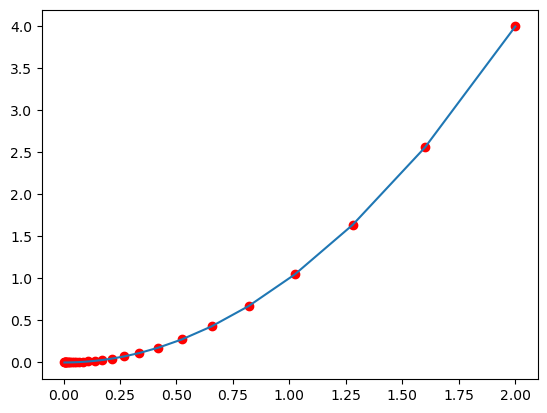

In [5]:
plt.plot(iteration_pd['x'], iteration_pd['y(x)'])
plt.scatter(iteration_pd['x'], iteration_pd['y(x)'], color='red') 

## Perceptron

#### Activation Function
Define our activation function, which will be a rectified linear unit (ReLu)
- https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

In [6]:
def relu(X):
    return np.maximum(0, X)

#### Loss Function
Define the loss function.

A common loss function is the **mean squared error**, which is also known as **L2 loss**.

\begin{equation}
    \frac{1}{n} \sum_{i=1}^n (y_{pred_i} - y_{targ_i})^2
\end{equation}

<!-- $$\frac{1}{n} \sum_{i=1}^n} (ypred - ytarg)^2$$

\begin{equation}
    \frac{1}{n} \sum_{i=1}^n} (ypred - ytarg)^2
\end{equation} -->

In [7]:
def mse_loss(predicted: np.array, target: np.array) -> np.array:
    ''' Mean Squared error loss function.
    
        Provides a single metric for the loss values.
    '''
    loss = np.mean(np.square(predicted - target))
    
    return loss

Gradient of the loss would be

\begin{equation}
    2*(y_{pred_i} - y_{targ_i})
\end{equation}

In [8]:
def mse_loss_gradient(predicted: np.array, target: np.array) -> np.array:
    ''' Gradient of the mean squared error loss.
            i.e., 2.0 * (output_Y2 - target_Y2)
    '''
    gradient = np.multiply(2.0, np.subtract(predicted, target))

    return gradient

#### Toy Data
Define some toy data:
- input x values
- target y values (for computing the loss function)
- two initial weight matrices

Random Number generators
- https://numpy.org/doc/stable/reference/random/generator.html
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html

In [9]:
rng = np.random.default_rng(seed=12345)

input_X1 = rng.normal(size=(2, 10))
target_Y2 = rng.normal(size=(2, 1))

weight_W1 = rng.normal(size=(10, 3))
weight_W2 = rng.normal(size=(3, 1))

Let's look at the resulting arrays:
- shape
- values

In [10]:
objects_ini = {'input_X1': input_X1, 'target_Y2': target_Y2,
               'weight_W1': weight_W1, 'weight_W2': weight_W2}

for key, value in objects_ini.items():
    print(f'{key}:\n{value.shape}')
    print(f'{np.around(value, 2)}\n')

input_X1:
(2, 10)
[[-1.42  1.26 -0.87 -0.26 -0.08 -0.74 -1.37  0.65  0.36 -1.95]
 [ 2.35  0.97 -0.76  0.9  -0.47 -0.06  0.79 -1.26  0.58  1.4 ]]

target_Y2:
(2, 1)
[[ 1.32]
 [-0.3 ]]

weight_W1:
(10, 3)
[[ 0.9  -1.62 -0.16]
 [ 0.45 -1.34 -0.08]
 [ 1.72  2.62  0.78]
 [ 0.83 -0.96 -1.21]
 [-1.41  0.54  0.75]
 [-0.66 -1.23  0.26]
 [ 0.31 -0.13  1.27]
 [-0.09 -0.07 -1.11]
 [ 0.14  1.35  0.06]
 [ 0.07  0.43  0.28]]

weight_W2:
(3, 1)
[[0.53]
 [0.54]
 [0.62]]



Final objects needed:
- an empty dictionary to store the iterations
- an initial large loss value (to start the `while` loop)
- convergence criteria (e.g., 6.0)
- an iteration counter

Define the learning rate (i.e., the stepsize for gradient decent optimization)
- learning rate (i.e., 1.0e-3)

### NN Steps in Detail

**Forward Propogation**

1. $X2 = X1\cdot W1$: transformation of input data into fewer dimensions
    - `transformer function`: linear combo; weighted sum

<br>

2. $Y1 = \text{ReLu}(X2)$: non-linear output in a few dimensions

<br>

3. $Y2 = Y1\cdot W2$: transformation of output data into fewer dimensions

<br>

4. $\text{Loss} = (Y2- \text{y target})^2$: loss for each observable computed

<br>

5. $\text{grad\_loss} = \frac{\partial L}{\partial x}$: gradient of the loss values

<br>

**Backwards Propogation**

***Update W2 Weights***

6. $\text{grad\_W2} = Y1^T \cdot \frac{\partial L}{\partial x}$: gradient of the weights connecting the hidden layer (after applying the ReLU activation) to the output layer
    - the gradient of the loss concerning the weights W2
    - each **element** in `grad_w2` reflects **how much** a **specific weight** should be **adjusted** based on the **hidden layer's output** and the corresponding **output error**
 
<br>

7. $W2_{new} = W2_{old} - \text{learning rate} * \text{grad\_W2}$: gradient descent that updates the weights W2

<br>

***Update W1 Weights***

8. $\text{grad\_Y1} = \frac{\partial L}{\partial x} \cdot W2^T$: gradient of the loss for the hidden layer output after ReLU
    -  the gradient of the loss concerning the hidden layer's output before the ReLU activation.
    -  quantifies how **changes** in the **hidden layer's output** (quantified by the weight values) affect the **overall loss**

<br>

9. `rev_X2[X2 < 0] = 0` (**Zeroing out negative gradients**): ensures that any **hidden unit** that was **inactive** (i.e., had a negative input to ReLu) **does not contribute** to the **gradient** (i.e. its value is set to zero).
    - consequently, they do not influence the output when they are inactive

<br>

10. $\text{grad\_W1} = X1^T \cdot \text{rev\_X2}$: gradient of the loss concerning the weights connecting the input layer to the hidden layer.
    - representing **how the loss changes** with respect to the **weights** connecting the **input layer** to the **hidden layer**
 
<br>

11. $W1_{new} = W1_{old} - \text{learning rate} * \text{grad\_W1}$: gradient descent that updates the weights W1

In [11]:
results = {}

loss = 2
convergence_criteria = 1.5
iteration = 0
learning_rate = 1.0e-3

while loss > convergence_criteria:
    if iteration > 50: # set maximum iterations
        break

    iteration += 1

    ## forward propagation
    # transform
    X2 = input_X1.dot(weight_W1)

    # activate
    Y1 = relu(X2)

    # transform
    output_Y2 = Y1.dot(weight_W2)

    loss = mse_loss(predicted=output_Y2, target=target_Y2)

    ## backwards propagation
    ## gradient of loss function
    grad_loss = mse_loss_gradient(predicted=output_Y2, target=target_Y2)
    
    ### update weight_W2
    grad_W2 = Y1.T.dot(grad_loss)

    ## gradient decent: w2_1 = w2_0 - learning_rate.(Y1.T).(dL/dx)
    # weight_W2 = weight_W2 - learning_rate.grad_Y1
    weight_W2 = np.subtract(weight_W2, np.dot(learning_rate, grad_W2))

    ### update weight_W1
    grad_Y1 = grad_loss.dot(weight_W2.T)

    ## reversing ReLu
    rev_X2 = grad_Y1.copy()
    rev_X2[X2 < 0] = 0

    grad_W1 = input_X1.T.dot(rev_X2)

    ## gradient decent: w1_1 = w1_0 - learning_rate.(X1.T).(dL/dx.grad_Y1)
    # weight_W1 = weight_W1 - learning_rate.grad_W1
    weight_W1 = np.subtract(weight_W1, np.dot(learning_rate, grad_W1))

    results[f'{iteration}'] = [output_Y2, loss, weight_W1, weight_W2]

    # objects_nn = {'X2': X2, 'Y1': Y1,
    #               'output_Y2': output_Y2, 'loss': loss,
    #               'grad_loss': grad_loss,
    #               'grad_Y1': grad_Y1, 'grad_W2': grad_W2, 'weight_W2': weight_W2,
    #               'rev_X2': rev_X2, 'grad_W1': grad_W1, 'weight_W1': weight_W1}

    # for key, value in objects_nn.items():
    #     print(f'{key}:\n{value.shape}')
    #     print(f'{np.around(value, 2)}\n')
    # print('\n\n')

In [12]:
iteration_pd = pd.DataFrame.from_dict(results, orient='index', columns=['y_predicted', 'loss', 'weight_W1', 'weight_W2'])
iteration_pd

,y_predicted,loss,weight_W1,weight_W2
1,"[[0.0], [1.9118756670288015]]",3.319766,"[[0.8975622523237371, -1.6215827341822058, -0....","[[0.5159510211583257], [0.5367209691186955], [..."
2,"[[0.0], [1.829276415278871]]",3.140503,"[[0.892541629678268, -1.6215827341822058, -0.1...","[[0.5023057516372724], [0.5367209691186955], [..."
3,"[[0.0], [1.7514578967040295]]",2.977857,"[[0.8878300592554061, -1.6215827341822058, -0....","[[0.48926936720860326], [0.5367209691186955], ..."
4,"[[0.0], [1.6779902371504898]]",2.829862,"[[0.8834030271738987, -1.6215827341822058, -0....","[[0.4767995573215262], [0.5367209691186955], [..."
5,"[[0.0], [1.608495169385268]]",2.694838,"[[0.8792385365069342, -1.6215827341822058, -0....","[[0.46485826491212623], [0.5367209691186955], ..."
6,"[[0.0], [1.5426385132943101]]",2.571339,"[[0.8753167842921421, -1.6215827341822058, -0....","[[0.45341114128370985], [0.5367209691186955], ..."
7,"[[0.0], [1.4801239332515812]]",2.458120,"[[0.8716198879990003, -1.6215827341822058, -0....","[[0.4424270842713719], [0.5367209691186955], [..."
8,"[[0.0], [1.4206877261374167]]",2.354100,"[[0.8681316527334956, -1.6215827341822058, -0....","[[0.43187784502153864], [0.5367209691186955], ..."
9,"[[0.0], [1.3640944464972136]]",2.258340,"[[0.864837372188346, -1.6215827341822058, -0.2...","[[0.42173769162764124], [0.5367209691186955], ..."
10,"[[0.0], [1.3101332158385919]]",2.170015,"[[0.8617236576969383, -1.6215827341822058, -0....","[[0.41198312013459504], [0.5367209691186955], ..."


Let's visualize the results for the second observable:

Text(0, 0.5, 'weight')

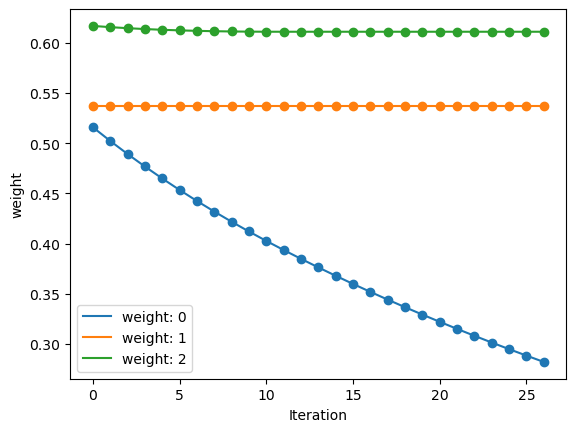

In [16]:
df_w2 = pd.DataFrame()

for iteration, values in results.items():
    weights_w2_list = [x.tolist() for x in results[iteration][3]]
    weights_w2_list = [item for sublist in weights_w2_list for item in sublist]
    df_w2 = pd.concat([df_w2, pd.DataFrame([weights_w2_list])], ignore_index=True)

fig, ax = plt.subplots()

for iteration in range(0, 3, 1):
    ax.plot(df_w2.index, df_w2[iteration], label=f'weight: {iteration}')
    ax.scatter(df_w2.index, df_w2[iteration]) 

ax.legend()
ax.set_xlabel('Iteration')
ax.set_ylabel('weight')

/tmp/ipykernel_8706/3303920721.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(iteration_pd.index.values, rotation=90)


Text(0, 0.5, 'Observable 2')

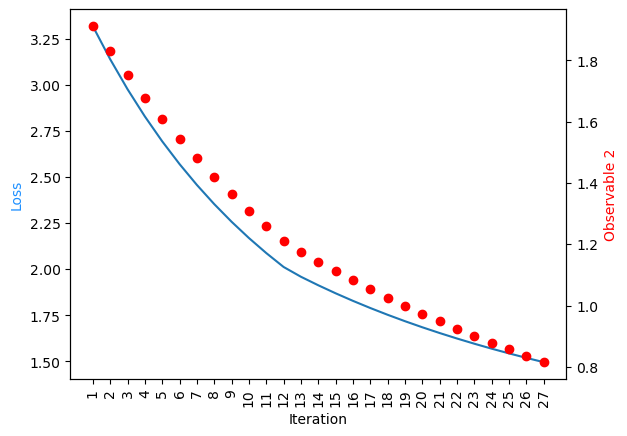

In [15]:
observable_2 = []
for values in iteration_pd['y_predicted'].values:
    observable_2.append(values[1])
observable_2

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(iteration_pd.index.values, iteration_pd['loss'])
ax2.scatter(iteration_pd.index.values, observable_2, color='red') 

ax1.set_xlabel('Iteration')
ax1.set_xticklabels(iteration_pd.index.values, rotation=90)

ax1.set_ylabel('Loss', color='DodgerBlue')
ax2.set_ylabel('Observable 2', color='red')